In [1]:
import requests
import re
import matplotlib.pyplot as plt

In [2]:
def get_content(article_name):
    # Set the URL for the Wikipedia API
    url = "https://en.wikipedia.org/w/api.php"

    # Set the parameters for the API request
    params = {
        "action": "query",
        "format": "json",
        "prop": "extracts",
        "exsectionformat": "wiki",
        "titles": article_name
    }

    # Send a GET request to the API and retrieve the JSON response
    response = requests.get(url, params=params)
    return response.json()
    

In [3]:
data = get_content("Ozone_layer")
print(data)

{'batchcomplete': '', 'warnings': {'extracts': {'*': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Special:MyLanguage/Extension:TextExtracts#Caveats.'}}, 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': {'22834': {'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'extract': '<p class="mw-empty-elt">\n</p>\n\n<p>The <b>ozone layer</b> or <b>ozone shield</b> is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O<sub>3</sub>) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosp

In [4]:
def merge_contents(data): 
    page_id = next(iter(data["query"]["pages"]))
    article_text = data["query"]["pages"][page_id]["extract"]
    # Remove HTML tags and replace special characters
    clean_text = re.sub(r'<[^>]+>', '', article_text)
    clean_text = re.sub(r'\n+', '\n', clean_text)
    clean_text = clean_text.replace('\xa0', ' ')
    clean_text = clean_text.strip()

    # Remove table of contents and other extraneous information
    clean_text = re.sub(r'\n?\[edit\]\n?', '\n', clean_text)
    clean_text = re.sub(r'^.*Contents\n\n', '', clean_text)
    clean_text = re.sub(r'^.*See also\n\n', '', clean_text)
    clean_text = re.sub(r'^.*References\n\n', '', clean_text)
    clean_text = re.sub(r'^.*Further reading\n\n', '', clean_text)
    clean_text = re.sub(r'^.*External links\n\n', '', clean_text)
    
    # Remove all non-alphabetic characters
    clean_text = re.sub(r'[^a-zA-Z\s]+', ' ', clean_text)

    return clean_text

In [5]:
data = get_content("Ozone_layer")
merge_content = merge_contents(data)
print(merge_content)

The ozone layer or ozone shield is a region of Earth s stratosphere that absorbs most of the Sun s ultraviolet  radiation  It contains a high concentration of ozone  O  in relation to other parts of the atmosphere  although still small in relation to other gases in the stratosphere  The ozone layer contains less than   parts per million of ozone  while the average ozone concentration in Earth s atmosphere as a whole is about   parts per million  The ozone layer is mainly found in the lower portion of the stratosphere  from approximately   to   kilometers   to   mi  above Earth  although its thickness varies seasonally and geographically The ozone layer was discovered in   by the French physicists Charles Fabry and Henri Buisson  Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of   K    C  except that there was no radiation below a waveleng

In [6]:
def tokenize(content):
    # Split the content into words based on whitespace and punctuation
    tokens = re.findall(r'\b\w+\b', content)
    return tokens

def lower_collection(tokens):
    return [token.lower() for token in tokens]

collection = tokenize(merge_content)
lower_collection = lower_collection(collection)
print(lower_collection)

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'sun', 's', 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'o', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'earth', 's', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'to', 'kilometers', 'to', 'mi', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'the', 'ozone', 'layer', 'was', 'discovered', 'in', 'by', 'the

In [7]:
def count_frequency(collection):
    word_counts = {}
    for token in collection:
        if token in word_counts:
            word_counts[token] += 1
        else:
            word_counts[token] = 1
    return word_counts

word_counts = count_frequency(lower_collection)
print(word_counts)

{'the': 214, 'ozone': 95, 'layer': 29, 'or': 6, 'shield': 2, 'is': 39, 'a': 33, 'region': 2, 'of': 106, 'earth': 12, 's': 33, 'stratosphere': 12, 'that': 21, 'absorbs': 4, 'most': 6, 'sun': 5, 'ultraviolet': 13, 'radiation': 16, 'it': 11, 'contains': 2, 'high': 5, 'concentration': 4, 'o': 22, 'in': 71, 'relation': 2, 'to': 63, 'other': 7, 'parts': 5, 'atmosphere': 12, 'although': 5, 'still': 2, 'small': 2, 'gases': 2, 'less': 4, 'than': 4, 'per': 3, 'million': 4, 'while': 4, 'average': 2, 'as': 13, 'whole': 1, 'about': 13, 'mainly': 2, 'found': 3, 'lower': 2, 'portion': 1, 'from': 14, 'approximately': 2, 'kilometers': 2, 'mi': 1, 'above': 4, 'its': 6, 'thickness': 3, 'varies': 3, 'seasonally': 1, 'and': 80, 'geographically': 1, 'was': 16, 'discovered': 2, 'by': 25, 'french': 1, 'physicists': 1, 'charles': 1, 'fabry': 1, 'henri': 1, 'buisson': 1, 'measurements': 1, 'showed': 1, 'sent': 1, 'out': 6, 'surface': 10, 'reaching': 3, 'ground': 3, 'on': 10, 'usually': 1, 'consistent': 1, 'with

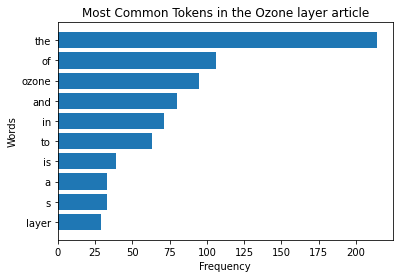

In [8]:
def print_most_frequent(frequencies, n):
    sorted_word_counts = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
    top_n_words = sorted_word_counts[:n]
    words, counts = zip(*top_n_words)
    words = words[::-1]
    counts = counts[::-1]
    plt.barh(range(len(words)), counts)
    plt.yticks(range(len(words)), words)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Most Common Tokens in the Ozone layer article')
    plt.show()

frequencies = count_frequency(lower_collection)

print_most_frequent(frequencies, 10)

In [9]:
stop_words = [ "the", "a", "o", "of", "to", "in", "about", "and", "is", "as", "s", "by", "are", "that", "be", "nm", "at", "for", "from", "was", "uv", "with", "it", "have", "on", "this", "has", "which", "these", "m", "into", "other", "an", "can", "because", "or", "its", "out", "all", "also", "over", "most"]

def remove_stop_words(words, stop_words):
    filtered_tokens = [token for token in words if token not in stop_words]
    return filtered_tokens

filtered_collection = remove_stop_words(lower_collection, stop_words)

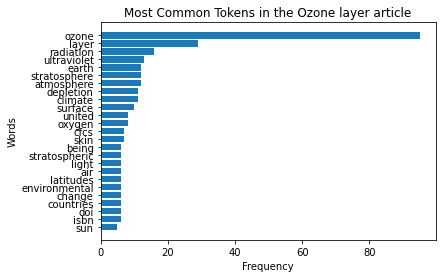

In [10]:
def print_most_frequent(frequencies, n):
    sorted_word_counts = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
    top_n_words = sorted_word_counts[:n]
    words, counts = zip(*top_n_words)
    words = words[::-1]
    counts = counts[::-1]
    plt.barh(range(len(words)), counts)
    plt.yticks(range(len(words)), words)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Most Common Tokens in the Ozone layer article')
    plt.show()

frequencies = count_frequency(filtered_collection)

print_most_frequent(frequencies, 25)
# print(filtered_collection)
